# Determining bounds [-M1, M2]

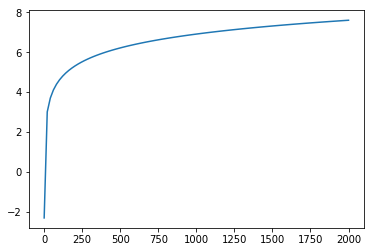

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
import numpy as np

x = np.linspace(0.1, 2000, 100)
y = np.log(x)

plt.plot(x, y)

# Variables

In [9]:
r = 0.04
sigma = 0.30
T = 1
K = 110

x = np.linspace(0, 6, Nx)
upper_bound = np.exp(max(x))

dt = T/Nt
dx = upper_bound/Nx

# Initializing first row of grid points and boundary conditions

In [6]:
#Vector of grid points
def initialize_grid(K, Nx, upper_bound, boundary):
    grid_vec = [max(0, np.exp(i) - K) for i in np.linspace(0, 6, Nx)]
    
    #Dirichlet Boundary conditions
    if boundary == 'dirichlet':
        grid_vec[0] = 0
        grid_vec[-1] = upper_bound
    
    return(np.array(grid_vec))

initialize_grid(K, Nx, upper_bound, 'dirichlet')

array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

# FTCS - Compute Diagonals


In [8]:
#For FTCS the scheme can be simplified to two tridiagonal matrix multiplications
#In this case B is the identity matrix, so only the diagonals of A will be computed here

Nx = 1000
Nt = 10

grid_vec = initialize_grid(K, Nx, upper_bound, 'dirichlet')

def compute_matrix_FTCS(grid_vec, r, sigma, Nx, Nt, upper_bound, T):
    
    dx = upper_bound/Nx
    dt = T/Nt
    
    c1 = (r - 0.5*(sigma**2))*(dt/dx**2)
    c2 = 0.5*(sigma**2)*(dt/dx**2)

    A = sp.diags((1, 0, -1), offsets= (-1, 0, 1), shape=(Nx, Nx))
    A = sp.lil_matrix(A)
    A[0] = 0
    A[-1] = 0
    
    B = sp.diags((1, -2, 1), offsets=(-1, 0, 1), shape=(Nx, Nx))
    B = sp.lil_matrix(B)
    B[0] = 0
    B[Nx-1, Nx-1] = -2
    B[Nx-1, Nx-2] = 2
    #print(B)
    
    boundary_vec = np.zeros(Nx)
    boundary_vec[-1] = upper_bound + (2*upper_bound/dx)
    
    C = np.identity(Nx)
    C[0] = 0
    C[-1] = 0
    
    matrix = (1-r*dt)*C + c1*A + c2*B
    
    return matrix

compute_matrix_FTCS(grid_vec, r, sigma, Nx, Nt, upper_bound, T)

matrix([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.02457685,  0.94070209,  0.03072106, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.02457685,  0.94070209, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ...,  0.94070209,
          0.03072106,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.02457685,
          0.94070209,  0.03072106],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.05529791, -0.05529791]])

# FTCS Simulation

In [36]:
Nx = 1000
Nt = 1000

#Returns options values for each time period

def FTCS_simulation(K, r, sigma, Nx, Nt, upper_bound, T):
    
    grid_vec = initialize_grid(K, Nx, upper_bound, 'dirichlet')
    
    dx = upper_bound/Nx
    dt = T/Nt
    
    c1 = (r - 0.5*(sigma**2))*(dt/dx**2)
    c2 = 0.5*(sigma**2)*(dt/dx**2)

    A = sp.diags((1, 0, -1), offsets= (-1, 0, 1), shape=(Nx, Nx))
    A = sp.lil_matrix(A)
    A[0] = 0
    A[0][0] = 1
    A[-1] = 0
    
    B = sp.diags((1, -2, 1), offsets=(-1, 0, 1), shape=(Nx, Nx))
    B = sp.lil_matrix(B)
    B[0] = 0
    B[-1] = 0
    #B[Nx-1, Nx-1] = -2
    #B[Nx-1, Nx-2] = 2
    
    C = np.identity(Nx)
    C[0] = 0
    C[-1] = 0
    
    bound1 = np.zeros(Nx)
    bound1[-1] = upper_bound
    
    bound2 = np.zeros(Nx)
    bound2[-1] = 2*upper_bound/dx
    
    bound = bound1 + bound2
    
    matrix = ((1-r*dt)*C + c1*A + c2*B)
    
    value_list = [grid_vec]
    
    for i in range(Nt):
        new_grid_vec = np.array(matrix.dot(value_list[i]))
        new_grid_vec[-1] = upper_bound
        value_list.append(new_grid_vec)
    
    return value_list

#value_list = FTCS_simulation(K, r, sigma, Nx, Nt, upper_bound, T)
#print(value_list)

# Plot of option values - FTCS

TypeError: plot_surface() missing 1 required positional argument: 'Z'

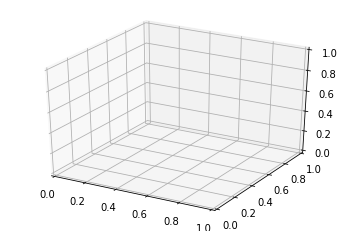

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Nx = 1000
Nt = 1000

t = np.linspace(0, 1, Nt)
x = np.linspace(0, 6, Nx)

X, T = np.meshgrid(x, t)

value_list = FTCS_simulation(K, r, sigma, Nx, Nt, upper_bound, T)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
Axes3D.plot_surface(X, T, value_list)



# Crank Nicholson - Compute diagonals

In [14]:
grid_vec = initialize_grid(K, Nx, upper_bound, 'dirichlet')

#Not impemented - Matrix vector notation will have A and B both sparse

#This will give a system of equations to be solved simulataneously

def compute_matrix_CN(grid_vec, r, sigma, Nx, Nt, upper_bound, T):
    
    a = (r - 0.5*(sigma**2))*dt/(4*dx)
    b = (1/4)*(sigma**2)*(dt/dx**2)
    c = r*dt/2

    A = sp.diags((1, 0, -1), offsets= (-1, 0, 1), shape=(Nx, Nx))
    A = sp.lil_matrix(A)
    A[0] = 0
    A[0, 0] = 1
    A[-1] = 0

    B = sp.diags((1, -2, 1), offsets=(-1, 0, 1), shape=(Nx, Nx))
    B = sp.lil_matrix(B)
    B[0] = 0
    B[Nx-1, Nx-1] = -2
    B[Nx-1, Nx-2] = 2
    
    C = np.identity(Nx)
    C[0] = 0
    C[-1] = 0
    

    matrixB = (1+c)*C - a*A - b*B 
    matrixA = (1-c)*C + a*A +b*B
    
    return matrixB, matrixA
    
compute_matrix_CN(grid_vec, r, sigma, Nx, Nt, upper_bound, T)

(matrix([[ 3.09844022e-04,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [-1.35146338e-02,  1.02964896e+00, -1.41343218e-02, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 0.00000000e+00, -1.35146338e-02,  1.02964896e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         ...,
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           1.02964896e+00, -1.41343218e-02,  0.00000000e+00],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
          -1.35146338e-02,  1.02964896e+00, -1.41343218e-02],
         [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00, -2.76489556e-02,  2.76489556e-02]]),
 matrix([[-3.09844022e-04,  0.00000000e+00,  0.00000000e+00, ...,
           0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
         [ 1.35146338e-02,  9.70351044e-01,  1.41343218e-02, ...,
           0.00000000e

# Crank-Nicolson simulation

In [41]:
Nx = 1000
Nt = 1000

grid_vec = initialize_grid(K, Nx, upper_bound, 'dirichlet')

#This will give a system of equations to be solved simulataneously
def compute_matrix_CN(grid_vec, r, sigma, Nx, Nt, upper_bound, T):
    
    a = (r - 0.5*(sigma**2))*dt/(4*dx)
    b = (1/4)*(sigma**2)*(dt/dx**2)
    c = r*dt/2

    A = sp.diags((1, 0, -1), offsets= (-1, 0, 1), shape=(Nx, Nx))
    A = sp.lil_matrix(A)
    A[0] = 0
    A[0][0] = 1
    A[-1] = 0

    B = sp.diags((1, -2, 1), offsets=(-1, 0, 1), shape=(Nx, Nx))
    B = sp.lil_matrix(B)
    B[0] = 0
    B[0][0] = 1
    #B[Nx-1, Nx-1] = -2
    #B[Nx-1, Nx-2] = 2 
    B[-1][-1] = 1
    
    C = np.identity(Nx)
    C[0][0] = 1
    C[-1] = 0

    matrixB = (1+c)*C - a*A - b*B
    matrixA = (1-c)*C + a*A + b*B
    
    matrixA = np.array(matrixA)
    matrixB = np.array(matrixB)
    
    value_list = [grid_vec]
    
    for i in range(Nt):
        right_side = matrixA.dot(value_list[i])
        right_side = np.array(right_side)
        #print(len(right_side))
        
        new_grid_vec = np.linalg.solve(matrixB, right_side)
        new_grid_vec[-1] = upper_bound
        value_list.append(new_grid_vec)
    
    return value_list[-1]
    
compute_matrix_CN(grid_vec, r, sigma, Nx, Nt, upper_bound, T)    

array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000, 0

# Comparison with Black-Scholes Analytical values

In [78]:
#initial vectors
# Option pricing using black scholes analytical
from scipy.stats import norm

r = 0.04
sigma = 0.30
T = 1
K = 99
S = 100


def BS_option(S, K, T, r, sigma):
    d1 = np.log(S/K)+(r+sigma**2/2)*T / sigma*np.sqrt(T)
    d2 = d1-sigma*np.sqrt(T)

    return max(0, S*norm.cdf(d1)-K*np.exp(-r*T)*norm.cdf(d2))

def BS_delta(S):
    d1 = np.log(S/K)+(r+sigma**2/2)*T / sigma*np.sqrt(T)
    
    return norm.cdf(d1)

Xs = initialize_grid(K, Nx, upper_bound, 'dirichlet')

Nx = 1000
prices = np.linspace(0, 6, Nx)

print(BS_option(100, K, T, r, sigma))
print(BS_delta(100))

print(BS_option(110, K, T, r, sigma))
print(BS_delta(110))

print(BS_option(120, K, T, r, sigma))
print(BS_delta(120))

14.230543210539231
0.6153855466784359
20.71705067298494
0.6512486834653567
27.750581806997964
0.6828578013580564


# Calculating Delta using scheme values

In [ ]:
option_values = FTCS_simulation(K, r, sigma, Nx, Nt, upper_bound, T)

def deltas():
    
    #run FTCS simulation to find option values
    option_values = FTCS_simulation(K, r, sigma, Nx, Nt, upper_bound, T)
    
    dx = upper_bound/Nx
    
    deltas = []
    
    for i in range(len(option_values)):
        if i == 0:
            deltas.append(0)
        else:
            dV = option_values[i] - option_values[i-1]
            dS = np.exp(dx)
            delta = dV/dS
            deltas.append(delta)
        
    return deltas
        
#print(deltas())

import matplotlib.pyplot as plt

prices = [np.exp(i) for i in np.linspace(0, 6, Nx)]

plt.plot(prices, deltas())